In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
#Problem 1 - Data Read, Write and Inspect:
#1) Load the provided dataset and import in pandas DataFrame.
df = pd.read_csv('/content/drive/MyDrive/Dataset/bank.csv')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
#2) Check info of the DataFrame and identify following:

#(a) columns with dtypes=object

object_columns = df.select_dtypes(include="object").columns
object_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [28]:
#(b) unique values of those columns.

for col in object_columns:
    print(f"Unique values for column '{col}':")
    print(df[col].unique())

Unique values for column 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values for column 'marital':
['married' 'single' 'divorced']
Unique values for column 'education':
['tertiary' 'secondary' 'unknown' 'primary']
Unique values for column 'default':
['no' 'yes']
Unique values for column 'housing':
['yes' 'no']
Unique values for column 'loan':
['no' 'yes']
Unique values for column 'contact':
['unknown' 'cellular' 'telephone']
Unique values for column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values for column 'poutcome':
['unknown' 'failure' 'other' 'success']
Unique values for column 'y':
['no' 'yes']


In [29]:
#(c) Total number of null values in each column

print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [30]:
#3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
# ”.csv” with name ”banknumericdata.csv”

df_numeric = df.drop(columns=object_columns)
df_numeric.head()


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [31]:
df_numeric.to_csv("banknumericdata.csv", index=False)
print("banknumericdata.csv saved successfully.")

banknumericdata.csv saved successfully.


In [32]:
#4) Read ”banknumericdata.csv” and Find the summary statistics.

df_num = pd.read_csv("banknumericdata.csv")
df_num.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [44]:
#Problem 2 - Data Imputations:

#1) Load the provided dataset and import in pandas DataFrame.

df = pd.read_csv('/content/drive/MyDrive/Dataset/medical_students_dataset.csv')
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [45]:
#2) Check info of the DataFrame and identify column with missing (null) values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [46]:
# Check total missing values in each column

print("\nMissing values in each column:\n")
print(df.isnull().sum())


Missing values in each column:

Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


In [48]:
#3)For the column with missing values fill the values using various techniques we discussed above. Try
#to explain why did you select the particular methods for particular column.

# Numerical continuous columns
num_cols = ['Age', 'Height', 'Weight', 'BMI', 'Temperature',
            'Heart Rate', 'Blood Pressure', 'Cholesterol']

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


# Categorical columns
cat_cols = ['Gender', 'Blood Type', 'Diabetes', 'Smoking']

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# Student ID (unique identifier)
df['Student ID'] = df['Student ID'].fillna(method='ffill')
df['Student ID'] = df['Student ID'].fillna(method='bfill')


In [49]:
print(df.isnull().sum())


Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


In [50]:
#4) Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
#{Hint: dataset.duplicated.sum()}

print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("After removal:", df.duplicated().sum())


Duplicate rows: 12842
After removal: 0


In [52]:
#Data Cleaning and Transformations with ”Titanic Dataset”:

#Problem - 1:
#Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
#Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
#median, maximum value, and minimum value of the ’Fare’ column?

df = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic-Dataset.csv')
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
#Create subset for required columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

#Retain rows where Pclass == 1 (First Class passengers)
first_class_df = subset_df[subset_df['Pclass'] == 1]

#Compute required statistics for Fare column
mean = first_class_df['Fare'].mean()
median = first_class_df['Fare'].median()
max = first_class_df['Fare'].max()
min = first_class_df['Fare'].min()

print("---- Fare Statistics for First Class Passengers ----")
print("Mean Fare:", mean)
print("Median Fare:", median)
print("Max Fare:", max)
print("Min Fare:", min)

---- Fare Statistics for First Class Passengers ----
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Max Fare: 512.3292
Min Fare: 0.0


In [57]:
first_class_df.head() #Displaying subset after the above compututation.

,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


In [58]:
#Problem 2:
#How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
#this out, drop them from your DataFrame.

# Count null values in age
null_age_count = subset_df['Age'].isnull().sum()
print(null_age_count)

# Drop rows with null age values
subset_df = subset_df.dropna(subset=['Age'])
print(len(subset_df))



177
714


In [68]:
#Problem 3:
#The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
#-tion:

# ’C’ for Cherbourg
# ’Q’ for Queenstown
# ’S’ for Southampton

# Loading full dataset again since subset_df may not include Embarked
df = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic-Dataset.csv')

#One-hot encode Embarked column
embarked_dummies = pd.get_dummies(df['Embarked'], prefix="Embarked")

#Add new columns
df = pd.concat([df, embarked_dummies], axis=1)

#Drop original column
df.drop(columns=['Embarked'], inplace=True)


In [70]:
#Printing the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


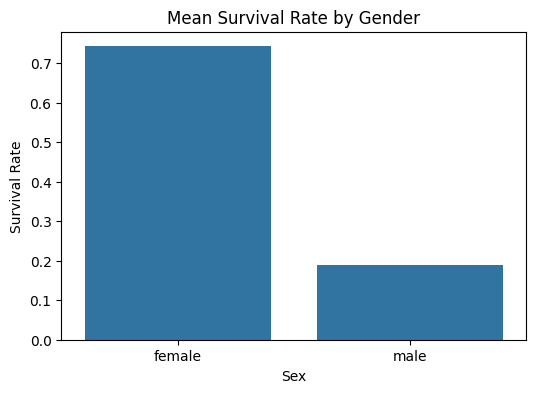

In [71]:
#Problem  4:
#Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
#-ization to show how the survival distributions vary by gender.

import matplotlib.pyplot as plt

# Mean survival rates
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(survival_by_sex)

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values)
plt.title("Mean Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Sex")
plt.show()

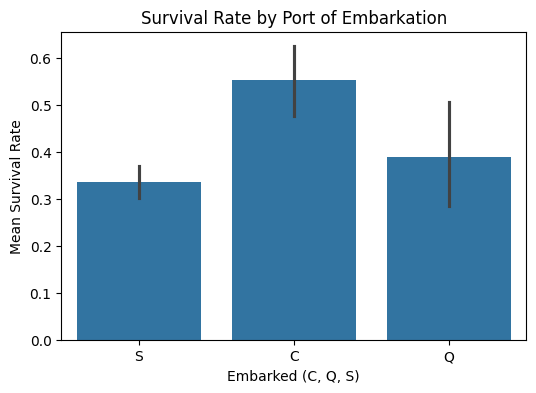

In [72]:
#Problem 5:
#Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
#barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

df2 = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic-Dataset.csv')
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='Survived', data=df2)
plt.title("Survival Rate by Port of Embarkation")
plt.xlabel("Embarked (C, Q, S)")
plt.ylabel("Mean Survival Rate")
plt.show()

Pclass  AgeGroup  
1       Very Young    0.809524
        Young         0.761905
        Adult         0.666667
        Mature        0.777778
        Older         0.506667
2       Very Young    0.742857
        Young         0.400000
        Adult         0.416667
        Mature        0.461538
        Older         0.363636
3       Very Young    0.333333
        Young         0.197674
        Adult         0.283582
        Mature        0.166667
        Older         0.088235
Name: Survived, dtype: float64


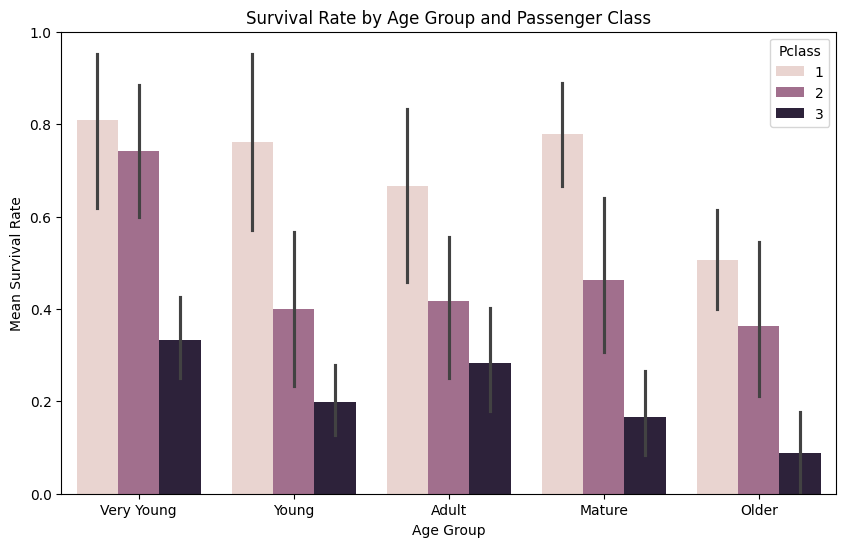

In [73]:
#Problem 6:
#Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
#’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
#and age group. Draw a visualization using a any plotting library to represent this graphically.

# Keeping only rows with age available
df_age_clean = df2.dropna(subset=['Age'])

# Creating 5 quantile-based bins
df_age_clean['AgeGroup'] = pd.qcut(df_age_clean['Age'], 5, labels=
 ['Very Young', 'Young', 'Adult', 'Mature', 'Older'])

# Computing survival mean by Pclass & AgeGroup
survival_age_pclass = df_age_clean.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()
print(survival_age_pclass)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=df_age_clean)
plt.title("Survival Rate by Age Group and Passenger Class")
plt.xlabel("Age Group")
plt.ylabel("Mean Survival Rate")
plt.legend(title="Pclass")
plt.show()